### V1535 Sco Spectral Index Work

In [1]:
#imports imports imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
#now to get all of the data

In [3]:
data = ([57067.5, 4.55, 4.132, 0.0203],#B
[57067.5, 7.38, 2.786, 0.0128],
[57067.5, 28.2, 0.819, 0.0575],
[57067.5, 36.5, 0.675, 0.0834],

        [57071.5, 13.5, 0.416, 0.0175], #B
[57071.5, 17.4, 0.344, 0.0213],
[57071.5, 28.2, 0.295, 0.0505],
[57071.5, 36.5, 0.376, 0.0714],

[57072.5, 1.26, 1.57, 0.0765], #B
[57072.5, 1.74, 1.21, 0.0728],
[57072.5, 4.55, 0.65, 0.0168],
[57072.5, 7.38, 0.439, 0.0126],

[57072.5, 4.87, 0.484, 0.0505], #VLBA

[57077.6, 13.5, 0.385, 0.0163], #B
[57077.6, 17.4, 0.456, 0.02],
[57077.6, 28.2, 0.785, 0.0485],
[57077.6, 36.5, 0.845, 0.0758],

[57077.7, 4.87, 0.155, 0.0409], #VLBA

[57082.5, 1.26, 0.0142, 0.101], #B
[57082.5, 1.74, 0.12, 0.0655],
[57082.5, 4.55, 0.221, 0.0181],
[57082.5, 7.38, 0.192, 0.0157],

[57088.5, 13.5, 0.585, 0.0166], #B
[57088.5, 17.4, 0.755, 0.0207],
[57088.5, 28.2, 1.15, 0.0462],
[57088.5, 36.5, 1.68, 0.071],

[57091.4, 1.26, 0.153, 0.0738], #B
[57091.4, 1.74, 0.11, 0.0538],
[57091.4, 4.55, 0.455, 0.0187],
[57091.4, 7.38, 0.536, 0.0136],

[57106.42, 13.5, 0.267, 0.0126], #B
[57106.42, 17.4, 0.299, 0.0143],
[57106.42, 28.2, 0.348, 0.0405],
[57106.42, 36.5, 0.186, 0.0551],

[57106.47, 1.26, 0.273, 0.112], #B
[57106.47, 1.74, 0.163, 0.0597],
[57106.47, 4.55, 0.222, 0.0161],
[57106.47, 7.38, 0.253, 0.012],

[57119.41, 13.5, 0.457, 0.0248], #B
[57119.41, 17.4, 0.399, 0.0182],
[57119.41, 28.2, 0.323, 0.0446],
[57119.41, 36.5, 0.276, 0.0602],

[57120.57, 1.26, 0.873, 0.1], #B
[57120.57, 1.74, 0.661, 0.0562],
[57120.57, 4.55, 0.483, 0.0191],
[57120.57, 7.38, 0.374, 0.0138],

[57130.35, 1.26, 0.444, 0.0813], #B
[57130.35, 1.74, 0.258, 0.056],
[57130.35, 4.55, 0.256, 0.0172],
[57130.35, 7.38, 0.228, 0.0117],

[57131.33, 13.5, 0.209, 0.0156], #B
[57131.33, 17.4, 0.167, 0.0221],
[57131.33, 28.2, 0.173, 0.0482],
[57131.33, 36.5, 0.0395, 0.0833],

[57143.3, 1.26, -0.0723, 0.106], #B
[57143.3, 1.74, 0.165, 0.0711],
[57143.3, 4.55, 0.17, 0.0183],
[57143.3, 7.38, 0.139, 0.0144],

[57143.34, 13.5, 0.129, 0.0168], #B
[57143.34, 17.4, 0.164, 0.0216],
[57143.34, 28.2, 0.174, 0.0523],
[57143.34, 36.5, 0.0153, 0.0753],

[57158.3, 1.26, -0.152, 0.177], #B_> BnA
[57158.3, 1.74, 0.101, 0.0784],
[57158.3, 4.55, 0.0727, 0.023],
[57158.3, 7.38, 0.0708, 0.0171],
[57158.3, 13.5, 0.0518, 0.0175],
[57158.3, 16.5, 0.0217, 0.0214],
[57158.3, 29.5, 0.0401, 0.0362],
[57158.3, 35, -0.00361, 0.045],

[57187.2, 1.26, 0.277, 0.116], #BnA _> A
[57187.2, 1.74, -0.0505, 0.0776],
[57187.2, 5, 0.0194, 0.0204],
[57187.2, 7, 0.044, 0.0223],
[57187.2, 13.5, 0.0587, 0.0157],
[57187.2, 16.5, 0.0569, 0.021],
[57187.2, 29.5, 0.13, 0.0446],
[57187.2, 35, -0.0206, 0.0588],

#57360.7	1.26	XX	XX #D
#57360.7	1.74	XX	XX
[57360.7, 5, 0.0795, 0.031],
[57360.7, 7, 0.0561, 0.022],
[57360.7, 13.5, -0.0000599, 0.0196],
[57360.7, 16.5, -0.000577, 0.0199],
[57360.7, 29.6, -0.0157, 0.051],
[57360.7, 35, 0.0632, 0.0608],)



df =  pd.DataFrame(data, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [4]:
#splitting it up by day

In [6]:


E1 = ([57067.5, 4.55, 4.132, 0.0203],#B
[57067.5, 7.38, 2.786, 0.0128],
[57067.5, 28.2, 0.819, 0.0575],
[57067.5, 36.5, 0.675, 0.0834],)

E2 = ( [57071.5, 13.5, 0.416, 0.0175], #B
[57071.5, 17.4, 0.344, 0.0213],
[57071.5, 28.2, 0.295, 0.0505],
[57071.5, 36.5, 0.376, 0.0714],				
    )

E3 = ([57072.5, 1.26, 1.57, 0.0765], #B
[57072.5, 1.74, 1.21, 0.0728],
[57072.5, 4.55, 0.65, 0.0168],
[57072.5, 7.38, 0.439, 0.0126],

[57072.5, 4.87, 0.484, 0.0505], #VLBA
    )

E4 = ([57077.6, 13.5, 0.385, 0.0163], #B
[57077.6, 17.4, 0.456, 0.02],
[57077.6, 28.2, 0.785, 0.0485],
[57077.6, 36.5, 0.845, 0.0758],

[57077.7, 4.87, 0.155, 0.0409], #VLBA
    )

E5 = ([57082.5, 1.26, 0.0142, 0.101], #B
[57082.5, 1.74, 0.12, 0.0655],
[57082.5, 4.55, 0.221, 0.0181],
[57082.5, 7.38, 0.192, 0.0157],				
    )

E6 = (	[57088.5, 13.5, 0.585, 0.0166], #B
[57088.5, 17.4, 0.755, 0.0207],
[57088.5, 28.2, 1.15, 0.0462],
[57088.5, 36.5, 1.68, 0.071],			
    )

E7 = ([57091.4, 1.26, 0.153, 0.0738], #B
[57091.4, 1.74, 0.11, 0.0538],
[57091.4, 4.55, 0.455, 0.0187],
[57091.4, 7.38, 0.536, 0.0136],
    )

E8 = ([57106.42, 13.5, 0.267, 0.0126], #B
[57106.42, 17.4, 0.299, 0.0143],
[57106.42, 28.2, 0.348, 0.0405],
[57106.42, 36.5, 0.186, 0.0551],

[57106.47, 1.26, 0.273, 0.112], #B
[57106.47, 1.74, 0.163, 0.0597],
[57106.47, 4.55, 0.222, 0.0161],
[57106.47, 7.38, 0.253, 0.012],
    )

E9 = ([57119.41, 13.5, 0.457, 0.0248], #B
[57119.41, 17.4, 0.399, 0.0182],
[57119.41, 28.2, 0.323, 0.0446],
[57119.41, 36.5, 0.276, 0.0602],
    )

E10 = ([57120.57, 1.26, 0.873, 0.1], #B
[57120.57, 1.74, 0.661, 0.0562],
[57120.57, 4.55, 0.483, 0.0191],
[57120.57, 7.38, 0.374, 0.0138],
    )

E11 = ([57130.35, 1.26, 0.444, 0.0813], #B
[57130.35, 1.74, 0.258, 0.056],
[57130.35, 4.55, 0.256, 0.0172],
[57130.35, 7.38, 0.228, 0.0117],

				
    )

E12 = (		[57131.33, 13.5, 0.209, 0.0156], #B
[57131.33, 17.4, 0.167, 0.0221],
[57131.33, 28.2, 0.173, 0.0482],
[57131.33, 36.5, 0.0395, 0.0833],		
    )


E13 =([57143.3, 1.26, -0.0723, 0.106], #B
[57143.3, 1.74, 0.165, 0.0711],
[57143.3, 4.55, 0.17, 0.0183],
[57143.3, 7.38, 0.139, 0.0144],

[57143.34, 13.5, 0.129, 0.0168], #B
[57143.34, 17.4, 0.164, 0.0216],
[57143.34, 28.2, 0.174, 0.0523],
[57143.34, 36.5, 0.0153, 0.0753],
    )

E14 = ([57158.3, 1.26, -0.152, 0.177], #B_> BnA
[57158.3, 1.74, 0.101, 0.0784],
[57158.3, 4.55, 0.0727, 0.023],
[57158.3, 7.38, 0.0708, 0.0171],
[57158.3, 13.5, 0.0518, 0.0175],
[57158.3, 16.5, 0.0217, 0.0214],
[57158.3, 29.5, 0.0401, 0.0362],
[57158.3, 35, -0.00361, 0.045],
    )

E15 = ([57187.2, 1.26, 0.277, 0.116], #BnA _> A
[57187.2, 1.74, -0.0505, 0.0776],
[57187.2, 5, 0.0194, 0.0204],
[57187.2, 7, 0.044, 0.0223],
[57187.2, 13.5, 0.0587, 0.0157],
[57187.2, 16.5, 0.0569, 0.021],
[57187.2, 29.5, 0.13, 0.0446],
[57187.2, 35, -0.0206, 0.0588],
				
    )

E16 = (#57360.7	1.26	XX	XX #D
#57360.7	1.74	XX	XX
[57360.7, 5, 0.0795, 0.031],
[57360.7, 7, 0.0561, 0.022],
[57360.7, 13.5, -0.0000599, 0.0196],
[57360.7, 16.5, -0.000577, 0.0199],
[57360.7, 29.6, -0.0157, 0.051],
[57360.7, 35, 0.0632, 0.0608],)

In [7]:
df1 =  pd.DataFrame(E1, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df2 =  pd.DataFrame(E2, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df3 =  pd.DataFrame(E3, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df4 =  pd.DataFrame(E4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df5 =  pd.DataFrame(E5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df6 =  pd.DataFrame(E6, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7 =  pd.DataFrame(E7, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df8 =  pd.DataFrame(E8, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df9 =  pd.DataFrame(E9, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df10 =  pd.DataFrame(E10, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df11 =  pd.DataFrame(E11, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df12 =  pd.DataFrame(E12, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13 =  pd.DataFrame(E13, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df14 =  pd.DataFrame(E14, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df15 =  pd.DataFrame(E15, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df16 =  pd.DataFrame(E16, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

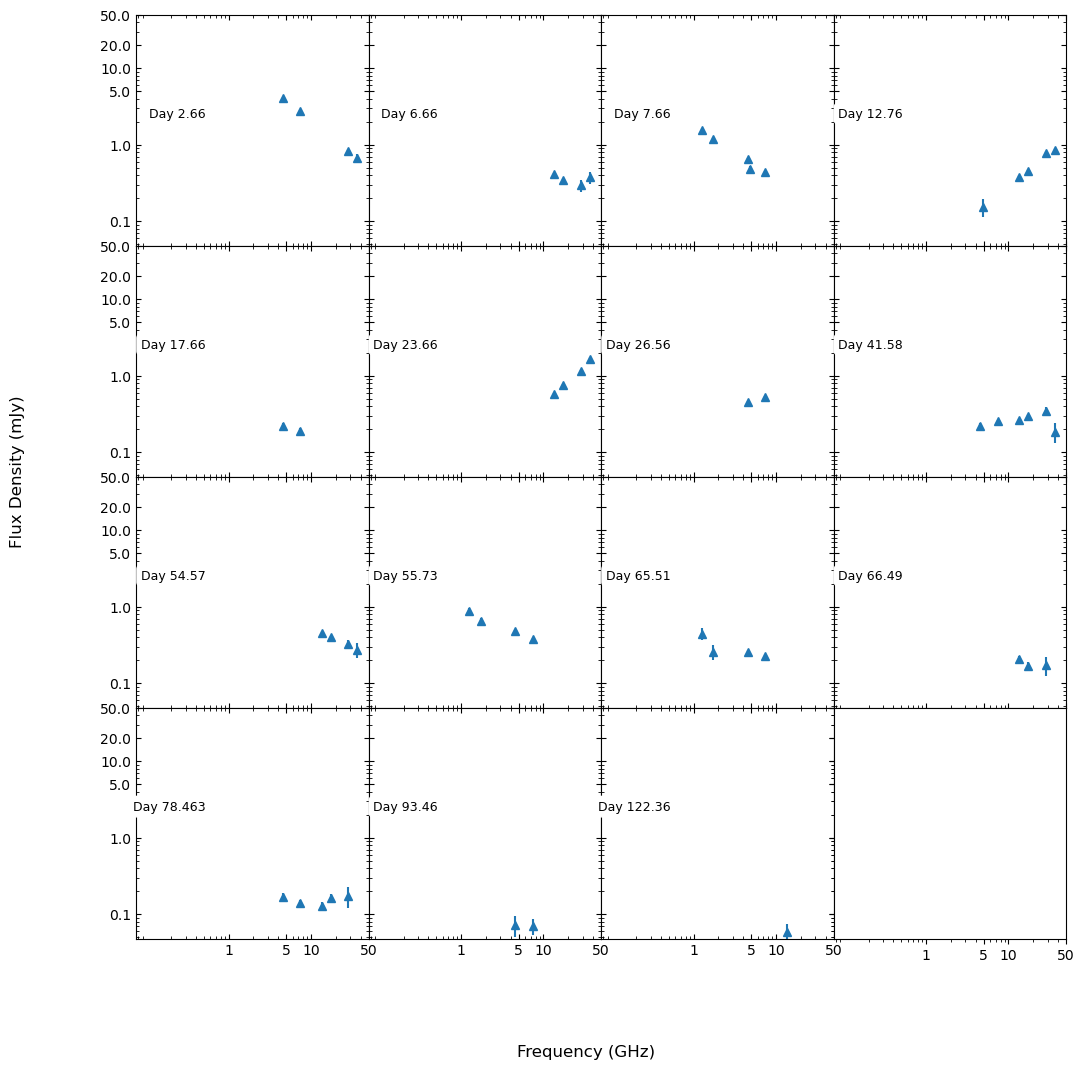

In [8]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16]


#the days by the list so they can all be defined
annotations = ['Day 2.66', 'Day 6.66', 'Day 7.66', 'Day 12.76', 'Day 17.66', 'Day 23.66',
               'Day 26.56', 'Day 41.58', 'Day 54.57', 'Day 55.73', 'Day 65.51', 'Day 66.49',
               'Day 78.463', 'Day 93.46', 'Day 122.36', 'Day 295.86' ]

#making the figure (4,4) is the (rows, columns)
fig, ax = plt.subplots(4, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux Density (mJy)'] > 3 * df['Uncertainty (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux Density (mJy)'][mask], yerr=df['Uncertainty (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
        ax[row, col].annotate(label, xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Finding the alpha for each day

#### Day 2.7

In [9]:
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x1 = df1['Freq (GHz)'][mask].values.tolist()
    y1 = df1['Flux Density (mJy)'][mask].values.tolist()
    yerr1 = df1['Uncertainty (mJy)'][mask].values.tolist()


In [10]:
PL1 =  PowerLaw1D(amplitude = y1[0], x_0= x1[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x1), max(x1)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit1 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model1 = fit1(PL1, x1, y1, maxiter=10000)

    #weight is 1/error^2
y_weight1 = 1/ (np.power(yerr1,2))  

    # fit the data using the uncertainties as weights
fit_model_weights1 = fit1(PL1, x1, y1, weights=y_weight1, maxiter=10000)

fit_model_weights1

<PowerLaw1D(amplitude=4.03381685, x_0=4.68788498, alpha=0.81590664)>

In [11]:
fit1.fit_info['message']

'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000'

In [12]:
print(fit1.fit_info)

{'nfev': 16, 'fvec': array([ 3.10675893, -2.47979854, 34.49392875, 11.63630239]), 'fjac': array([[-7.73981532e+03,  4.11004804e+03,  2.88517969e+03,
        -2.88174675e-02],
       [ 4.11004804e+03, -2.65769418e+03, -1.86565344e+03,
        -6.80761241e-03],
       [ 2.88517969e+03, -1.86565344e+03, -3.74722886e-14,
         5.21450009e-01]]), 'ipvt': array([3, 1, 2], dtype=int32), 'qtf': array([-1.42524104e-03,  9.21614178e-04, -3.57161813e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 3.50938891e+26, -4.99925779e+26, -1.87401678e+10],
       [-4.99925779e+26,  7.12163259e+26,  2.66960808e+10],
       [-1.87401678e+10,  2.66960808e+10,  1.05734273e-06]]), 'njev': 6, 'cov_x': array([[ 3.50938891e+26, -4.99925779e+26, -1.87401678e+10],
       [-4.99925779e+26,  7.12163259e+26,  2.66960808e+10],
       [-1.87401678e+10,  2.66960808e+10,  1.05734273e-06]])}


In [233]:
param_cov1= np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag1 = stand(param_cov1) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag1[2]) #Just showing the standard devation on the slope


The standard deviation is 0.004741844124388738


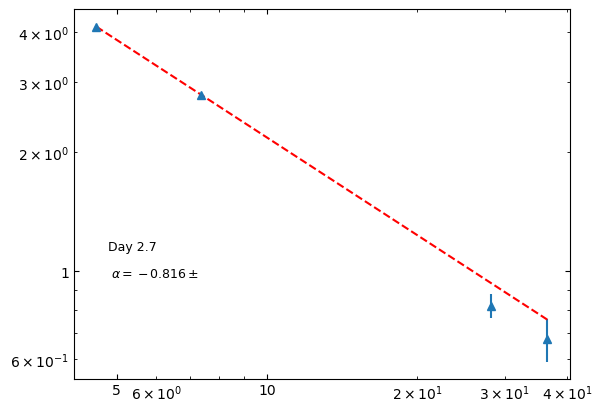

In [14]:
fig,ax = plt.subplots()
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=df1['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 2.7', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.816 \\pm }$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    #ax.annotate('${\u03B1 2 =  \\pm }$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

#### Day 6.66

In [15]:
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x2 = df2['Freq (GHz)'][mask].values.tolist()
    y2 = df2['Flux Density (mJy)'][mask].values.tolist()
    yerr2 = df2['Uncertainty (mJy)'][mask].values.tolist()


In [16]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x2), max(x2)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)

    #weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2,2))  

    # fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2

<PowerLaw1D(amplitude=0.40868864, x_0=13.78465553, alpha=0.66748666)>

In [17]:
print(y_weight2)

[3265.30612245 2204.14820693  392.11841976  196.15689413]


In [18]:
print(y2, yerr2)

[0.416, 0.344, 0.295, 0.376] [0.0175, 0.0213, 0.0505, 0.0714]


In [19]:
print(fit2.fit_info)

{'nfev': 13, 'fvec': array([ -5.15692272,  12.88040236, -16.29025139, -31.90281314]), 'fjac': array([[-3.82007668e+03,  6.98540817e+01, -7.55981765e+01,
         2.68073217e-02],
       [ 6.98540817e+01,  1.86804055e+02, -2.16108403e-15,
         2.14964170e-01],
       [-7.55981765e+01,  1.35837052e-14, -4.55894759e-15,
         5.91458671e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([2.76647146e-04, 5.66563207e-05, 3.50241704e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 1.88429668e+25, -9.52160239e+26,  6.92375977e+10],
       [-9.52160239e+26,  4.81139266e+28, -3.49866815e+12],
       [ 6.92375977e+10, -3.49866815e+12,  2.83067087e-04]]), 'njev': 6, 'cov_x': array([[ 1.88429668e+25, -9.52160239e+26,  6.92375977e+10],
       [-9.52160239e+26,  4.81139266e+28, -3.49866815e+12],
       [ 6.92375977e+10, -3.49866815e+12,  2.83067087e-04]])}


In [20]:
param_cov2 = np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(param_cov2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag2[2]) #Just showing the standard devation on the slope
print(diag2[1], diag2[0], diag2[2])

The standard deviation is 0.019297090324709578
790700192234705.4 10532205039781.555 0.019297090324709578


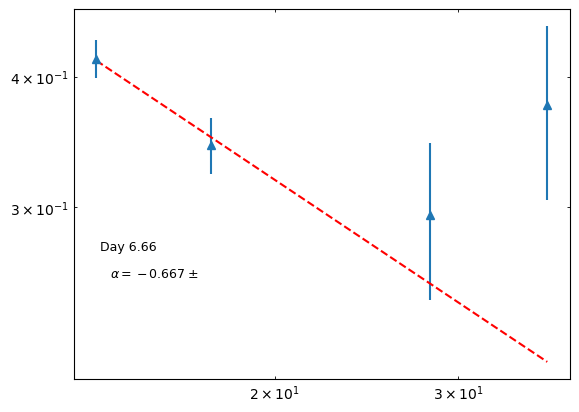

In [22]:
fig,ax = plt.subplots()
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=df2['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 6.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.667 \\pm }$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 7.66

In [23]:
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x3 = df3['Freq (GHz)'][mask].values.tolist()
    y3 = df3['Flux Density (mJy)'][mask].values.tolist()
    yerr3 = df3['Uncertainty (mJy)'][mask].values.tolist()


In [24]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x3), max(x3)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit3 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)

    #weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3,2))  

    # fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)
fit_model_weights3

<PowerLaw1D(amplitude=1.74160665, x_0=1.26, alpha=0.77699218)>

In [25]:
print(fit3.fit_info)

{'nfev': 21, 'fvec': array([ 29.3231915 ,  27.4140847 , -27.65075709,  12.76144573,
        49.07820155]), 'fjac': array([[ 5.72096618e+03, -2.19806797e+03, -2.04062021e+03,
         8.57791470e-01,  5.64420577e-02],
       [-2.19806797e+03, -3.98235571e+02, -3.69709930e+02,
        -8.24929979e-01,  3.26116305e-02],
       [-2.04062021e+03, -3.69709930e+02,  3.86642337e-13,
         5.88072370e-01,  1.83772615e-02]]), 'ipvt': array([3, 2, 1], dtype=int32), 'qtf': array([-1.43274728e-03, -2.59593799e-04,  3.87560805e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 6.68930788e+24, -6.21015230e+24, -1.74643093e+08],
       [-6.21015230e+24,  5.76531866e+24,  1.62133397e+08],
       [-1.74643093e+08,  1.62133397e+08,  9.65928077e-07]]), 'njev': 9, 'cov_x': array([[ 6.68930788e+24, -6.21015230e+24, -1.74643093e+08],
       [-6.21015230e+24,  5.76531866e+24,  1.62133397e+08],


In [243]:
param_cov3= np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(param_cov3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag3[2]) #Just showing the standard devation on the slope


The standard deviation is 0.00237985744951247


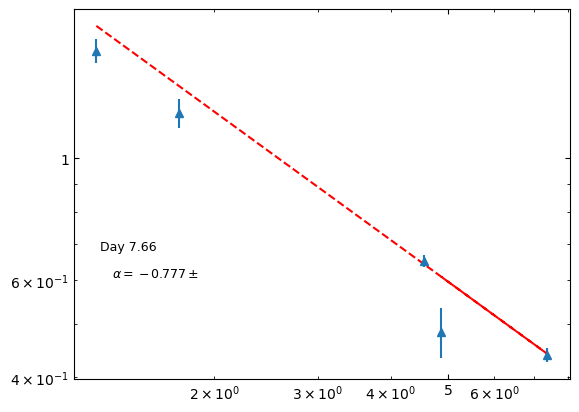

In [26]:
fig,ax = plt.subplots()
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=df3['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 7.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.777 \\pm }$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 12.76

In [27]:
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x4 = df4['Freq (GHz)'][mask].values.tolist()
    y4 = df4['Flux Density (mJy)'][mask].values.tolist()
    yerr4 = df4['Uncertainty (mJy)'][mask].values.tolist()


In [28]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x4), max(x4)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4, maxiter=10000)

    #weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4,2))  

    # fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4, maxiter=10000)

fit_model_weights4

<PowerLaw1D(amplitude=0.36866547, x_0=12.98635748, alpha=-0.81473048)>

In [29]:
print(fit4.fit_info)

{'nfev': 17, 'fvec': array([-16.92683963,  29.75166451, -38.92874974,   1.85078161,
         6.45772023]), 'fjac': array([[-5.10678139e+03,  3.00067651e+02,  1.18139547e+02,
         7.91693679e-02,  5.26928909e-02],
       [ 3.00067651e+02,  3.41745572e+02,  1.33060553e-13,
         4.03818227e-01, -3.15413079e-01],
       [ 1.18139547e+02,  8.76028247e-15, -1.12247362e-14,
         5.05086309e-01, -4.73638122e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([-3.75591313e-03, -4.97740901e-05,  4.57835910e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 4.24760163e+24,  1.83609752e+26, -4.70663975e+09],
       [ 1.83609752e+26,  7.93684156e+27, -2.03452450e+11],
       [-4.70663975e+09, -2.03452450e+11,  1.37776604e-05]]), 'njev': 8, 'cov_x': array([[ 4.24760163e+24,  1.83609752e+26, -4.70663975e+09],
       [ 1.83609752e+26,  7.93684156e+27, -2.03452450e+11],


In [248]:
param_cov4= np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(param_cov4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag4[2]) #Just showing the standard devation on the slope


The standard deviation is 0.004022866502880751


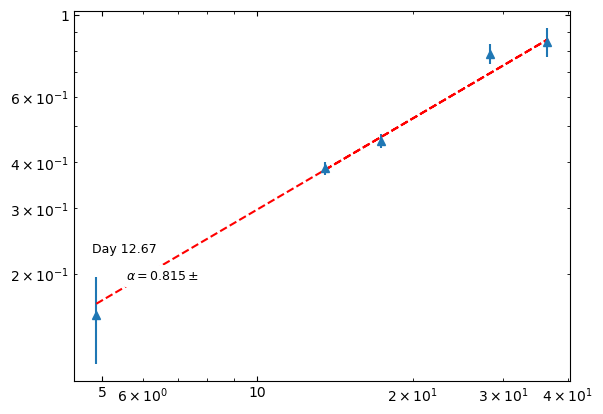

In [30]:
fig,ax = plt.subplots()
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=df4['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 12.67', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.815 \\pm }$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 17.66

In [33]:
#This one only has two points

mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x5 = df5['Freq (GHz)'][mask].values.tolist()
    y5 = df5['Flux Density (mJy)'][mask].values.tolist()
    yerr5 = df5['Uncertainty (mJy)'][mask].values.tolist()


In [34]:
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

In [37]:
fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= .3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)

    #weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5,2))  

    # fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)

fit_model_weights5

<PowerLaw1D(amplitude=0.221, x_0=4.55, alpha=0.29084746)>

In [38]:
#Same slope as PL3 
alpha_err5 = two_points(y5,x5,yerr5)
print(alpha_err5)

(-0.29084746179610177, 0.23929282019097284)


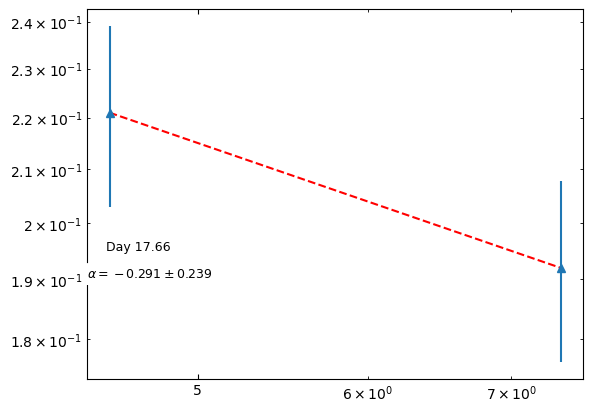

In [39]:
fig,ax = plt.subplots()
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq (GHz)'][mask], df5['Flux Density (mJy)'][mask], yerr=df5['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 17.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.291 \\pm 0.239}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 23.66

In [40]:
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x6 = df6['Freq (GHz)'][mask].values.tolist()
    y6 = df6['Flux Density (mJy)'][mask].values.tolist()
    yerr6 = df6['Uncertainty (mJy)'][mask].values.tolist()


In [41]:
PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x6), max(x6)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6, maxiter=10000)

    #weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6,2))  

    # fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6, maxiter=10000)

fit_model_weights6

<PowerLaw1D(amplitude=0.58584861, x_0=13.5, alpha=-0.98152856)>

In [42]:
print(fit6.fit_info)

{'nfev': 22, 'fvec': array([  3.07959213,  -8.02258137,  26.81451544, -24.77166274]), 'fjac': array([[-4.84273034e+03,  4.00232366e+02,  2.06767595e+02,
         1.08991254e-01],
       [ 4.00232366e+02,  5.59693119e+02,  4.20629267e-11,
         5.05756027e-01],
       [ 2.06767595e+02,  9.05800092e-15, -2.80865637e-14,
         5.62359388e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([-4.96534648e-05,  9.73065362e-08, -1.27581879e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 2.31093199e+24,  5.41246342e+25, -8.75946067e+08],
       [ 5.41246342e+25,  1.26766000e+27, -2.05156451e+10],
       [-8.75946067e+08, -2.05156451e+10,  3.52429584e-06]]), 'njev': 11, 'cov_x': array([[ 2.31093199e+24,  5.41246342e+25, -8.75946067e+08],
       [ 5.41246342e+25,  1.26766000e+27, -2.05156451e+10],
       [-8.75946067e+08, -2.05156451e+10,  3.52429584e-06]])}


In [258]:
param_cov6= np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(param_cov6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag6[2]) #Just showing the standard devation on the slope


The standard deviation is 0.005935783663510658


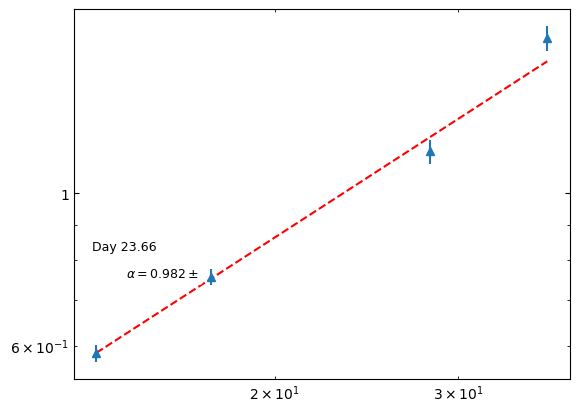

In [43]:
fig,ax = plt.subplots()
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=df6['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 23.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.982 \\pm }$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 26.56

In [44]:
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x7 = df7['Freq (GHz)'][mask].values.tolist()
    y7 = df7['Flux Density (mJy)'][mask].values.tolist()
    yerr7 = df7['Uncertainty (mJy)'][mask].values.tolist()


In [46]:
fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)

    #weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7,2))  

    # fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7

<PowerLaw1D(amplitude=0.455, x_0=4.55, alpha=-0.33875315)>

In [48]:
#Same slope as PL7
alpha_err7 = two_points(y7,x7,yerr7)
print(alpha_err7)

(0.33875314735322787, 0.09986689578024961)


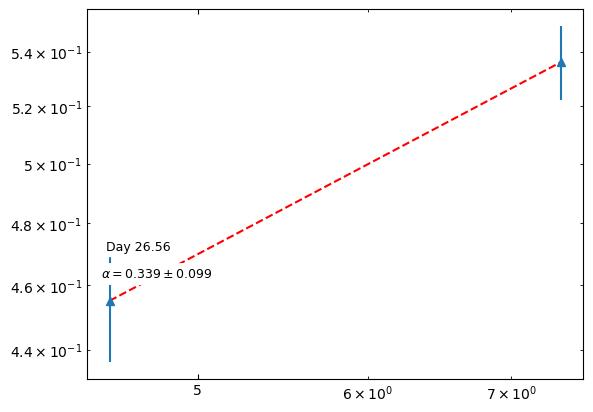

In [49]:
fig,ax = plt.subplots()
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=df7['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 26.56', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.339 \\pm 0.099}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 41.58

In [50]:
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x8 = df8['Freq (GHz)'][mask].values.tolist()
    y8 = df8['Flux Density (mJy)'][mask].values.tolist()
    yerr8 = df8['Uncertainty (mJy)'][mask].values.tolist()
